## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import ray
import pyarrow.parquet as pq

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.fft import *
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [4]:
def sample(signal, kernel_size):
    sampled = np.zeros((signal.shape[0], signal.shape[1], signal.shape[2]//kernel_size))
    for i in range(signal.shape[2]//kernel_size):
        begin = kernel_size * i
        end = min(kernel_size * (i + 1), signal.shape[2])
        sampled[:, :, i] = np.mean(signal[:, :, begin:end], axis=2)
    return sampled

In [5]:
def filter_signal(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

## Get Signals

In [6]:
signals = pq.read_pandas('/home/jd/data/vsb/train.parquet').to_pandas()

In [7]:
import pickle
import gc
from fastai.tabular import *
import pandas as pd
import ray
import pyarrow
import pyarrow.parquet as pq

torch.cuda.set_device(0)
pd.options.display.max_rows = 5
pd.options.display.max_columns = 5

In [8]:
#df = pd.read_csv(path/'metadata_train.csv')
#df = df
#pickle.dump(df, open( "/home/jd/data/vsb/metadata_train.p", "wb" ) )
df=pickle.load(open( "/home/jd/data/vsb/metadata_train.p", "rb" ) )

In [9]:
df[:5]

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [10]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [11]:
signals = np.array(signals).T.reshape((8712//3, 3, 800000))

In [12]:
len(signals)

2904

In [13]:
signals

array([[[ 18,  18,  17,  18, ...,  19,  17,  19,  17],
        [  1,   0,  -1,   1, ...,   1,   0,   1,   0],
        [-19, -19, -20, -19, ..., -19, -19, -18, -19]],

       [[-16, -17, -17, -16, ..., -15, -15, -14, -14],
        [ -5,  -6,  -6,  -5, ...,  -4,  -4,  -3,  -4],
        [ 19,  19,  19,  20, ...,  20,  21,  22,  21]],

       [[-15, -17, -17, -16, ..., -17, -16, -16, -17],
        [ 15,  16,  15,  16, ...,  15,  14,  17,  14],
        [ -1,   0,  -3,   0, ...,  -3,  -2,  -1,  -4]],

       [[-16, -15, -15, -15, ..., -18, -18, -17, -15],
        [ -9, -10, -10,  -9, ..., -12, -12, -11, -10],
        [ 23,  22,  22,  22, ...,  20,  19,  20,  22]],

       ...,

       [[-11, -12, -12, -13, ..., -10, -10,  -9, -10],
        [ -5,  -7,  -9,  -9, ...,  -7,  -5,  -4,  -4],
        [ 18,  17,  16,  16, ...,  18,  18,  19,  19]],

       [[-22, -21, -21, -21, ..., -20, -20, -19, -21],
        [ 12,  12,  13,  12, ...,  13,  13,  13,  13],
        [  8,   8,   8,   8, ...,   9,   9

In [14]:
sampled = sample(signals, 100)

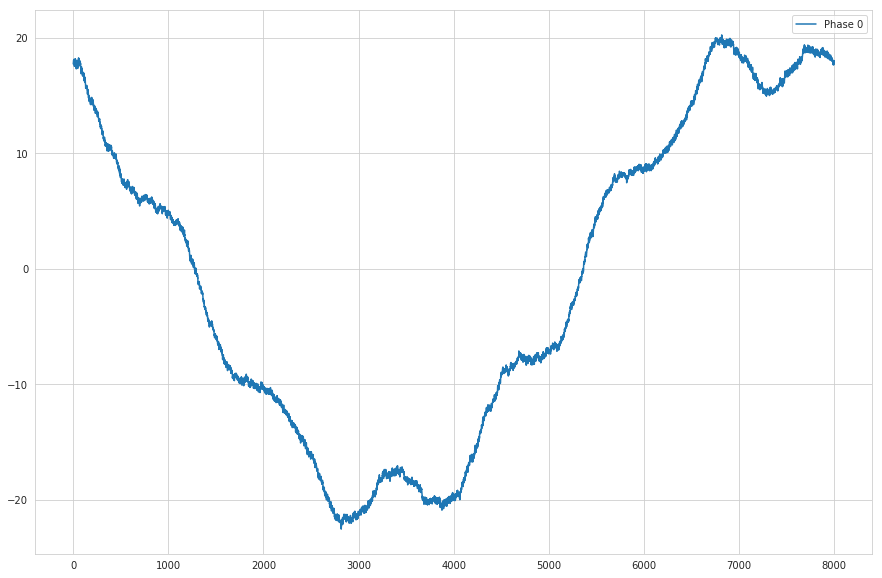

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(sampled[0, 0, :], label='Phase 0')
#plt.plot(sampled[0, 1, :], label='Phase 1')
#plt.plot(sampled[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

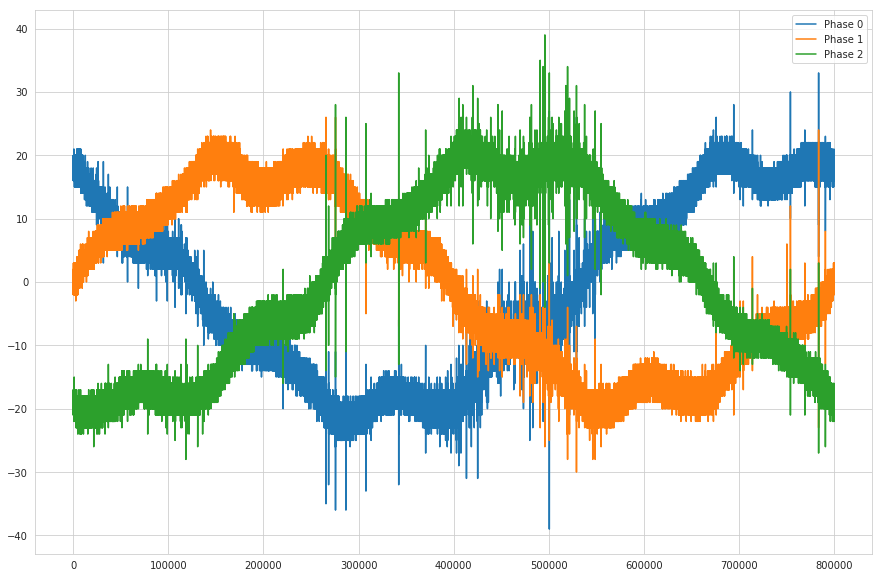

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(signals[0, 0, :], label='Phase 0')
plt.plot(signals[0, 1, :], label='Phase 1')
plt.plot(signals[0, 2, :], label='Phase 2')
plt.legend()
plt.show()

In [ ]:
len(signals)

In [ ]:
i = 0
#767
#1545
# 2305
#2584

from matplotlib import pyplot as mp
for i in range(2584,2904):
    plt.figure(figsize=(15, 10))
    plt.plot(signals[i, 0, :])
    plt.plot(signals[i, 1, :])
    plt.plot(signals[i, 2, :])
    plt.plot(filter_signal(signals[i, 0, :], threshold=1e3))
    plt.plot(filter_signal(signals[i, 1, :], threshold=1e3))
    plt.plot(filter_signal(signals[i, 2, :], threshold=1e3))
    plt.ylim((-80,80))
    plt.xlim((0,800000))
    mp.savefig('/home/jd/data/vsb/trainimages/'+str(i) +'.png', bbox_inches='tight')
    print (i)
    plt.clf()


## Get Test Signals build into files

In [ ]:
# import dependencies
import pickle
import ray
import pyarrow.parquet as pq

In [ ]:
## load in data
parquet_file = pq.ParquetFile('/home/jd/data/vsb/test.parquet')

In [ ]:
parquet_file.metadata

In [ ]:
20337/3

In [ ]:
20337//5, 5085/3, 8712 + 5085

In [ ]:
18884-13797 

In [ ]:
18882-8712, 10170/3

In [ ]:
part4= list(range(23970, 29060))
part3= list(range(18885, 23970)) #Part 3 starts on 5086
part2= list(range(13797, 18884)) # Check these numbers    Ends at 3391
part1= list(range(8712, 13796)) # .20, 44067, 1695.0, 13797  Ends at 1695

b=[]
for i in part4:
    b.append(str(i))

In [ ]:
tsignals = pq.read_pandas('/home/jd/data/vsb/test.parquet', b).to_pandas()

In [ ]:
len(tsignals.columns)

In [ ]:
tsignals.info()

In [ ]:
import numpy as np
import pandas as pd
tsignals = np.array(tsignals).T.reshape((5079//3, 3, 800000))

In [ ]:
5079/3

In [ ]:
tsignals[:6]

In [ ]:
i = 0
#115
#Part 1 goes to 640
#Part 2 goes to 3391
#Part 3 starts on 5086

#1695 - 1696

#600

from matplotlib import pyplot as mp
for i in range(0,650):
    plt.figure(figsize=(15, 10))
    plt.plot(tsignals[i, 0, :])
    plt.plot(tsignals[i, 1, :])
    plt.plot(tsignals[i, 2, :])
    plt.plot(filter_signal(tsignals[i, 0, :], threshold=1e3))
    plt.plot(filter_signal(tsignals[i, 1, :], threshold=1e3))
    plt.plot(filter_signal(tsignals[i, 2, :], threshold=1e3))
    plt.ylim((-80,80))
    plt.xlim((0,800000))
    mp.savefig('/home/jd/data/vsb/train/'+str(i+5086) +'T.png', bbox_inches='tight')
    if i%30 == 0:
        print (i)
    plt.clf()
    plt.close('all')